In [1]:
import tensorflow

In [2]:
from tensorflow.keras.datasets import cifar10

data = cifar10.load_data()

(x_train, y_train), (x_test, y_test) = data

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
class_name = ['airplane', 'automobile', 'bird' , 'cat' , 'deer' , 'dog' , 'frog' , 'horse' , 'ship' , 'truck']

def get_name(n):
    n=int(n)
    return class_name[n]

truck


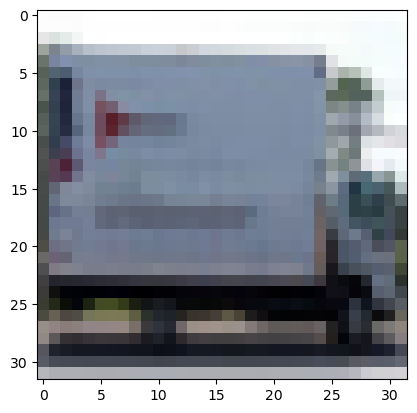

In [7]:
import matplotlib.pyplot as plt 
plt.imshow(x_train[495])
print(get_name(y_train[495]))

In [8]:
x_train[495]

array([[[253, 253, 253],
        [253, 252, 253],
        [253, 252, 253],
        ...,
        [251, 254, 254],
        [251, 254, 254],
        [252, 255, 254]],

       [[253, 253, 253],
        [254, 253, 254],
        [253, 253, 253],
        ...,
        [245, 251, 254],
        [245, 251, 253],
        [247, 252, 251]],

       [[229, 230, 229],
        [218, 225, 223],
        [227, 236, 233],
        ...,
        [244, 252, 253],
        [243, 252, 253],
        [244, 252, 250]],

       ...,

       [[ 85,  86,  94],
        [ 32,  35,  45],
        [ 25,  28,  37],
        ...,
        [ 22,  26,  40],
        [ 30,  34,  48],
        [ 70,  73,  85]],

       [[ 87,  91, 102],
        [ 70,  75,  86],
        [ 69,  74,  85],
        ...,
        [ 89,  92, 105],
        [ 91,  95, 108],
        [ 99, 104, 116]],

       [[181, 183, 187],
        [172, 174, 180],
        [172, 174, 179],
        ...,
        [208, 207, 209],
        [209, 207, 210],
        [211, 209, 213]]

In [9]:
x_train[495].shape

(32, 32, 3)

In [10]:
x_train = x_train/255
x_test = x_test/255

In [11]:
x_train[495]

array([[[0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.98823529, 0.99215686],
        [0.99215686, 0.98823529, 0.99215686],
        ...,
        [0.98431373, 0.99607843, 0.99607843],
        [0.98431373, 0.99607843, 0.99607843],
        [0.98823529, 1.        , 0.99607843]],

       [[0.99215686, 0.99215686, 0.99215686],
        [0.99607843, 0.99215686, 0.99607843],
        [0.99215686, 0.99215686, 0.99215686],
        ...,
        [0.96078431, 0.98431373, 0.99607843],
        [0.96078431, 0.98431373, 0.99215686],
        [0.96862745, 0.98823529, 0.98431373]],

       [[0.89803922, 0.90196078, 0.89803922],
        [0.85490196, 0.88235294, 0.8745098 ],
        [0.89019608, 0.9254902 , 0.91372549],
        ...,
        [0.95686275, 0.98823529, 0.99215686],
        [0.95294118, 0.98823529, 0.99215686],
        [0.95686275, 0.98823529, 0.98039216]],

       ...,

       [[0.33333333, 0.3372549 , 0.36862745],
        [0.1254902 , 0.1372549 , 0.17647059],
        [0.09803922, 0

In [13]:
print("x_min: {}".format(x_train.min()))
print("x_max: {}".format(x_test.max()))

x_min: 0.0
x_max: 1.0


In [23]:
from tensorflow.keras.models import Sequential
model = Sequential()

In [24]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten

model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', strides=(1,1), input_shape=(32, 32,3)))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', strides=(1,1)))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='valid'))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', strides=(1,1)))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', strides=(1,1)))
model.add(MaxPooling2D(padding='valid', pool_size=2, strides=2))

model.add(Dropout(0.3))

model.add(Flatten())

In [25]:
from tensorflow.keras.layers import Dense

model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_12 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

In [27]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

In [29]:
from tensorflow.keras.callbacks import EarlyStopping
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
history  = model.fit(x_train, y_train, epochs=50, batch_size=50, verbose=1, validation_data=(x_test, y_test),callbacks=(callbacks) )

Epoch 1/50
1000/1000 [==============================] - 101s 101ms/step - loss: 1.4281 - sparse_categorical_accuracy: 0.4749 - val_loss: 1.1507 - val_sparse_categorical_accuracy: 0.5888
Epoch 2/50
1000/1000 [==============================] - 96s 96ms/step - loss: 1.0201 - sparse_categorical_accuracy: 0.6359 - val_loss: 0.9130 - val_sparse_categorical_accuracy: 0.6843
Epoch 3/50
1000/1000 [==============================] - 144s 144ms/step - loss: 0.8394 - sparse_categorical_accuracy: 0.7067 - val_loss: 0.8096 - val_sparse_categorical_accuracy: 0.7170
Epoch 4/50
1000/1000 [==============================] - 157s 157ms/step - loss: 0.7295 - sparse_categorical_accuracy: 0.7438 - val_loss: 0.7766 - val_sparse_categorical_accuracy: 0.7298
Epoch 5/50
1000/1000 [==============================] - 100s 100ms/step - loss: 0.6532 - sparse_categorical_accuracy: 0.7708 - val_loss: 0.7429 - val_sparse_categorical_accuracy: 0.7461
Epoch 6/50
1000/1000 [==============================] - 98s 98ms/step - 

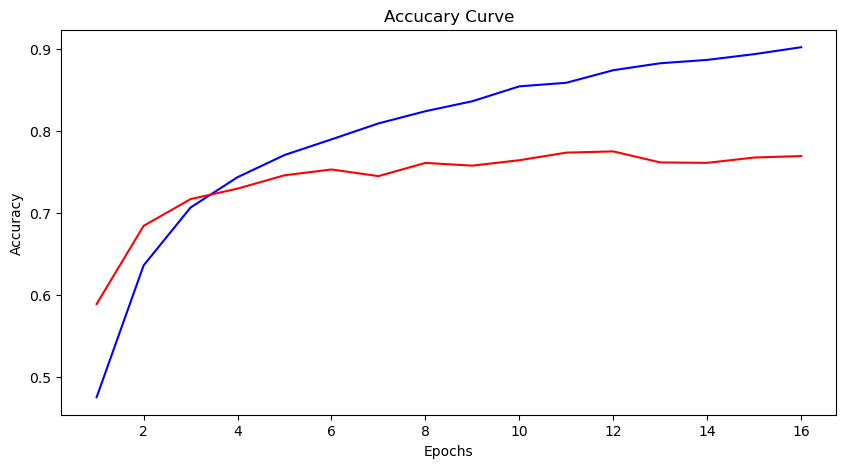

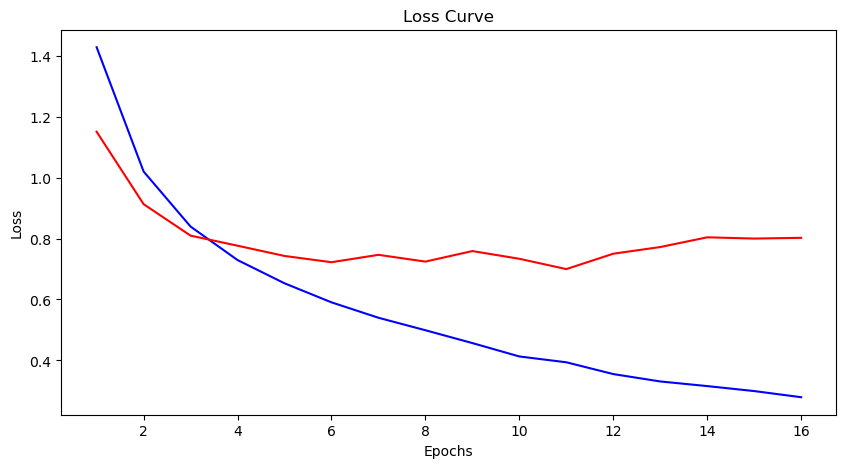

In [34]:
train_accuracy = history.history['sparse_categorical_accuracy']
test_accuracy = history.history['val_sparse_categorical_accuracy']

train_loss = history.history['loss']
test_loss = history.history['val_loss']

epoch  = range(1, len(train_accuracy)+1)

plt.figure(figsize=(10, 5))
plt.plot(epoch, train_accuracy, 'b', label='Train Accuracy')
plt.plot(epoch, test_accuracy, 'r', label='Test Accuracy')
plt.title("Accucary Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(epoch, train_loss, 'b', label='Train Loss')
plt.plot(epoch, test_loss, 'r', label='Test Loss')
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


In [35]:
loss , accuracy = model.evaluate(x_test, y_test)
print("Accuracy: {}".format(accuracy))
print("Loss :{}".format(loss))

313/313 [==============================] - 6s 20ms/step - loss: 0.8024 - sparse_categorical_accuracy: 0.7696
Accuracy: 0.769599974155426
Loss :0.8024446368217468


In [36]:
predictions = model.predict(x_test)

import numpy as np
prediction_values  = np.argmax(predictions, axis=1)


313/313 [==============================] - 6s 20ms/step


In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction_values)

<Axes: >

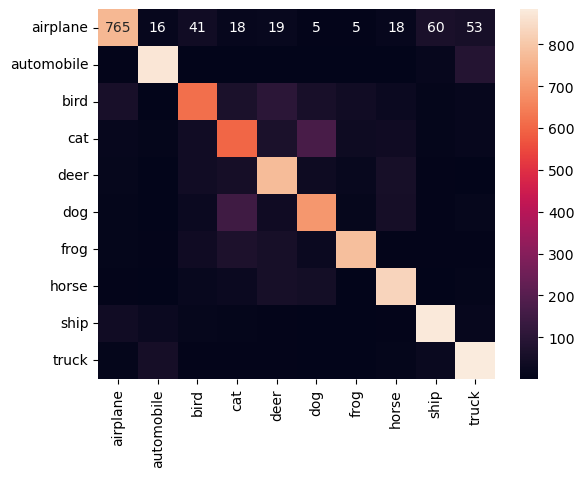

In [42]:
import seaborn as sns

sns.heatmap(cm , annot=True, fmt='d', xticklabels=class_name, yticklabels =class_name)